### Łączenie ramek

Popatrzmy na diagram Vienna

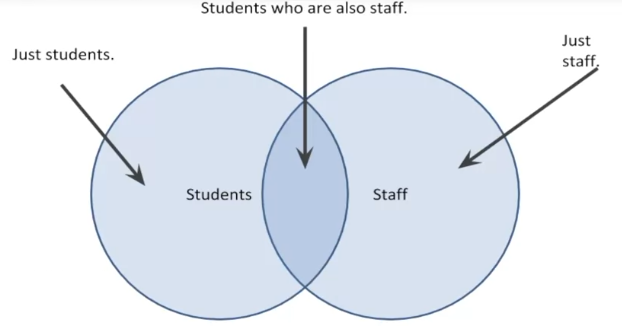

Diagram przedstawia dwie populacje, które częściowo się na siebie nakładają. Wyobraźmy sobie, że oba zbiory reprezentujemy za pomocą oddzielnych ramek.

Możemy chcieć połączyć je razem na kilka sposobów:

1. możemy potrzebować listę wszystkich ludzi, niezależnie od tego kim są (sql: full outer join, teoria zbiorów: unia)
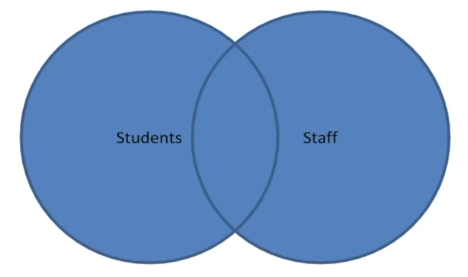

2. Możemy potrzebować listę osób, które są i studentami i pracownikami (sql: inner join, teoria zbiorów: przecięcie)

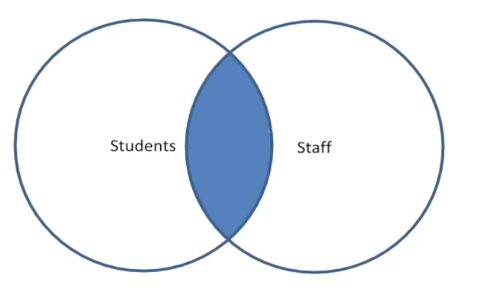

W ogólności

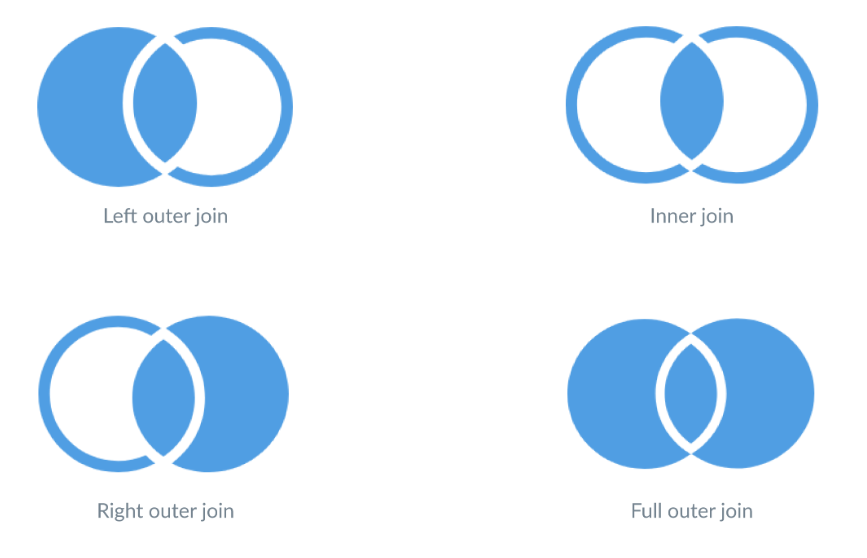

W jaki sposób możemy wykonać te operacje na ramkach danych za pomocą biblioteki pandas ?

In [1]:
import pandas as pd

In [2]:
staff_df = pd.DataFrame([
    {'Name': 'Kelly', 'Role': 'Directoro of HR'},
    {'Name': 'Sally', 'Role': 'Course liasion'},
    {'Name': 'James', 'Role': 'Grader'},
])

# zaindeksujmy ramkę kolumną 'Name'
staff_df = staff_df.set_index('Name')
staff_df

,Role
Name,
Kelly,Directoro of HR
Sally,Course liasion
James,Grader


In [3]:
student_df = pd.DataFrame([
    {'Name': 'James', 'School': 'Business'},
    {'Name': 'Mike', 'School': 'Law'},
    {'Name': 'Sally', 'School': 'Engineering'},
])
student_df = student_df.set_index('Name')
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


Przy mergowaniu ramek bardzo ważne jest, żeby obie ramki miały uzgodnione indeksy (co ma miejsce w naszym przykładzie), bo to na podstawie indeksów zachodzi identyfikacja wpisu.

In [5]:
# Zróbmy unię obu ramek
pd.merge(student_df, staff_df, how='outer', left_index=True, right_index=True)

,School,Role
Name,,
James,Business,Grader
Kelly,NaN,Directoro of HR
Mike,Law,NaN
Sally,Engineering,Course liasion


Zwróćmy uwagę na puste wartości w wynikowej ramce.

In [6]:
# Zróbmy przecięcie
pd.merge(student_df, staff_df, how='inner', left_index=True, right_index=True)

,School,Role
Name,,
James,Business,Grader
Sally,Engineering,Course liasion


Istnieją dwie inne, popularne metody łączenia ramek. Moglibyśmy nazwać je dodawaniem zbiorów. 

Pierwszy przypadek to lista pracowników niezależnie od tego czy są studentami czy nie, ale jeżeli są studentami to chcielibyśmy również mieć ich szczegóły studenckie (**left join**). Kolejność umieszczania ramek w funkcji jest tutaj bardzo istotna, ponieważ ramka umieszczona na pierwszej pozycji w funkcji oznacza, żę będzie pełniła funkcję lewej ramki podczas łączenia, a ramka na drugiej pozycji będzie pełniła funkcję prawej ramki podczas łączenia.

In [7]:
pd.merge(student_df, staff_df, how='left', left_index=True, right_index=True)

,School,Role
Name,,
James,Business,Grader
Mike,Law,NaN
Sally,Engineering,Course liasion


Drugi przypadek to lista studentów niezależnie od tego czy są pracownikami czy nie, ale jeżeli są pracownikami to chcielibyśmy również mieć ich szczegóły pracownicze (**right join**).

In [8]:
pd.merge(student_df, staff_df, how='right', left_index=True, right_index=True)

,School,Role
Name,,
Kelly,NaN,Directoro of HR
Sally,Engineering,Course liasion
James,Business,Grader


Możemy to zrobić w inny sposób. Funkcja merge posiada kilka interesujących parametrów. Po pierwsze do łączenia nie trzeba zawsze używać indeksów, można również użyć kolumn.b

Ustawmy domyślne indeksy.

In [10]:
student_df.reset_index(inplace=True)

In [9]:
staff_df.reset_index(inplace=True)

I teraz zmergujmy obie w parametrze on podając po której kolumnie będziemy łączyli ramki.

In [11]:
pd.merge(student_df, staff_df, how='right', on='Name')

,Name,School,Role
0,Kelly,NaN,Directoro of HR
1,Sally,Engineering,Course liasion
2,James,Business,Grader


A co zrobić kiedy pojawią się konflikty pomiędzy dwoma łączonymi ramkami ?

Przyjmimy, że w ramce staff_df mamy kolumnę location, która reprezentuje lokalizację biura, a w ramce student_df mamy taką sama kolumnę, która reprezentuje adres domowy studenta.

In [12]:
staff_df = pd.DataFrame([
    {'Name': 'Kelly', 'Role': 'Directoro of HR', 'Location': 'State Street'},
    {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
    {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'},
])

In [13]:
student_df = pd.DataFrame([
    {'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
    {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
    {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'},
])

Funkcja `merge` przechowa obie te informacje z suffixem `_x` dla lewej ramki i suffixem `_y` dla prawej ramki.

In [14]:
pd.merge(student_df, staff_df, how='left', on='Name')

,Name,School,Location_x,Role,Location_y
0,James,Business,1024 Billiard Avenue,Grader,Washington Avenue
1,Mike,Law,Fraternity House #22,NaN,NaN
2,Sally,Engineering,512 Wilson Crescent,Course liasion,Washington Avenue


O funkcji `merge` możemy myśleć jako o łączeniu horyzontalnym (poziomym) ramek.

Ale ramki możemy łączyć również wertykalnie (pionowo). Wertykalne łaczenie ramek nazywamy konkatenacją i używamy to niej funkcji `concat`. Funkcja `concat` ustawia jedną ramkę na szczycie lub na dole drugiej ramki.

**Use case**

Załóżmy, że prowadzimy roczny audyt jakiś informacji. Co roku wyniki odkładane są do pliku csv, co roku powstaje nowy plik csv z tymi samymi kolumnami, ale różnymi danymi. Co możemy zrobić jeżeli chcielibyśmy wszystkie zebrane w ciągu ostatnich lat informacje umieścić w jednej ramce? 

Możemy je skonkatenować.

Załóżmy, że prowadzimy coroczny rejestr absolwentów jakiejś fikcyjnej uczelni. Mamy pliki csv na rok 2011 i 2012. Wczytajmy zawartość do ramek.

In [15]:
df_2011 = pd.read_csv('data/graduates_2011.csv')
df_2011

,first_name,last_name,major,gpa
0,Anna,Kowalska,Informatyka,4.5
1,Jan,Nowak,Zarządzanie,4.2
2,Katarzyna,Wiśniewska,Matematyka,3.8
3,Michał,Zając,Fizyka,4.0
4,Ewa,Kowalewska,Informatyka,4.6
5,Tomasz,Szymański,Ekonomia,3.9
6,Agnieszka,Pawlak,Informatyka,4.3
7,Piotr,Wiśniewski,Zarządzanie,4.1
8,Zuzanna,Jankowska,Matematyka,3.7
9,Jakub,Nowicki,Fizyka,4.2


In [16]:
df_2012 = pd.read_csv('data/graduates_2012.csv')
df_2012

,first_name,last_name,major,gpa
0,Olga,Nowakowska,Informatyka,4.4
1,Mateusz,Kowalczyk,Zarządzanie,4.0
2,Karolina,Księżak,Matematyka,3.9
3,Szymon,Majewski,Fizyka,4.1
4,Natalia,Kot,Informatyka,4.5
5,Kamil,Zawadzki,Ekonomia,4.2
6,Patrycja,Jastrzębska,Informatyka,4.3
7,Marek,Woźniak,Zarządzanie,4.1
8,Monika,Wójcik,Matematyka,3.8
9,Bartek,Baran,Fizyka,4.0


Połączmy je wertykalnie.

In [18]:
res = pd.concat([df_2011, df_2012])
res

,first_name,last_name,major,gpa
0,Anna,Kowalska,Informatyka,4.5
1,Jan,Nowak,Zarządzanie,4.2
2,Katarzyna,Wiśniewska,Matematyka,3.8
3,Michał,Zając,Fizyka,4.0
4,Ewa,Kowalewska,Informatyka,4.6
5,Tomasz,Szymański,Ekonomia,3.9
6,Agnieszka,Pawlak,Informatyka,4.3
7,Piotr,Wiśniewski,Zarządzanie,4.1
8,Zuzanna,Jankowska,Matematyka,3.7
9,Jakub,Nowicki,Fizyka,4.2


In [19]:
res.loc[0]

,first_name,last_name,major,gpa
0,Anna,Kowalska,Informatyka,4.5
0,Olga,Nowakowska,Informatyka,4.4


In [21]:
res.reset_index(inplace=True)
res

,index,first_name,last_name,major,gpa
0,0,Anna,Kowalska,Informatyka,4.5
1,1,Jan,Nowak,Zarządzanie,4.2
2,2,Katarzyna,Wiśniewska,Matematyka,3.8
3,3,Michał,Zając,Fizyka,4.0
4,4,Ewa,Kowalewska,Informatyka,4.6
5,5,Tomasz,Szymański,Ekonomia,3.9
6,6,Agnieszka,Pawlak,Informatyka,4.3
7,7,Piotr,Wiśniewski,Zarządzanie,4.1
8,8,Zuzanna,Jankowska,Matematyka,3.7
9,9,Jakub,Nowicki,Fizyka,4.2


Ok, tylko utraciliśmy informacje o tym w którym roku poszczególne osoby ukończyły szkołę. Na taki przypadek, kiedy tej informacji nie ma w samych danych, a jest w nazwie lub lokalizacji pliku metoda concat ma specjalny parametr. Możemy ustawić dodatkowy poziom indeksu (wielokrotny indeks), poprzez przekazanie listy kluczy identyfikujących poszczególne ramki składowe do parametru keys.

In [25]:
res2 = pd.concat([df_2011, df_2012], keys=['2011', '2012'])
res2

first_name    last_name        major  gpa
2011 0       Anna     Kowalska  Informatyka  4.5
     1        Jan        Nowak  Zarządzanie  4.2
     2  Katarzyna   Wiśniewska   Matematyka  3.8
     3     Michał        Zając       Fizyka  4.0
     4        Ewa   Kowalewska  Informatyka  4.6
     5     Tomasz    Szymański     Ekonomia  3.9
     6  Agnieszka       Pawlak  Informatyka  4.3
     7      Piotr   Wiśniewski  Zarządzanie  4.1
     8    Zuzanna    Jankowska   Matematyka  3.7
     9      Jakub      Nowicki       Fizyka  4.2
2012 0       Olga   Nowakowska  Informatyka  4.4
     1    Mateusz    Kowalczyk  Zarządzanie  4.0
     2   Karolina      Księżak   Matematyka  3.9
     3     Szymon     Majewski       Fizyka  4.1
     4    Natalia          Kot  Informatyka  4.5
     5      Kamil     Zawadzki     Ekonomia  4.2
     6   Patrycja  Jastrzębska  Informatyka  4.3
     7      Marek      Woźniak  Zarządzanie  4.1
     8     Monika       Wójcik   Matematyka  3.8
     9     Bartek        Baran       Fizyka  4.0

Praca z ramkami z wielokrotnym indeksem nie różni się znacznie od pracy z ramkami z jednokrotnym indeksem.

In [27]:
res2['first_name'][('2011', 8)]

'Zuzanna'

In [28]:
res2.loc[('2011', 8), 'first_name']

'Zuzanna'